In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basic autoencoder

In [11]:
"""
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_file = Input(shape=(288,432, 3)) 

x = Conv2D(100, (3, 3), activation='elu', padding='same')(input_file) 
x = MaxPooling2D((2, 2), padding='valid')(x) 
x = Conv2D(80, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(40, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(10, (3, 3), activation='elu', padding='same')(x) 
#x = MaxPooling2D((2, 2), padding='same')(x)


x = Flatten()(x)
x = Dense(2430, activation='elu')(x)
x = Dense(1215, activation='elu')(x)

x = Dense(608, activation='elu')(x)
x = Dense(304, activation='elu')(x)
encoded = Dense(152, activation='elu')(x)

#.flat 13x72x40 features
# dense layer 10000-5000-2000-----128(200,300,500)
# reshape 13x72x40 (unfold) 

x = Dense(304, activation='elu')(encoded)
x = Dense(608, activation='elu')(x)
x = Dense(1215, activation='elu')(x)
x = Dense(2430, activation='elu')(x)
x = Dense(4860, activation='elu')(x)

x = Reshape((18,27 , 10))(x)
x = Conv2DTranspose(20, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(20, (3, 3), activation='elu', padding='same')(x)

x = Conv2DTranspose(40, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(40, (3, 3), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Cropping2D(cropping=((0, 0), (1, 1)), data_format=None)(x)
x = Conv2DTranspose(80, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(80, (3, 3), activation='elu', padding='same')(x)

x = Conv2DTranspose(100, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(100, (3, 3), activation='elu', padding='same')(x)

#x = Conv2DTranspose(100, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
#x = Conv2D(100, (3, 3), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (1, 1), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_file, decoded)
autoencoder.compile(optimizer='adam', loss='mse') #msse
autoencoder.summary()
# 100 epoch
#encoder = model()
#model.saveweights
"""

"\nfrom tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras import backend as K\n\ninput_file = Input(shape=(288,432, 3)) \n\nx = Conv2D(100, (3, 3), activation='elu', padding='same')(input_file) \nx = MaxPooling2D((2, 2), padding='valid')(x) \nx = Conv2D(80, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(40, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(20, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(10, (3, 3), activation='elu', padding='same')(x) \n#x = MaxPooling2D((2, 2), padding='same')(x)\n\n\nx = Flatten()(x)\nx = Dense(2430, activation='elu')(x)\nx = Dense(1215, activation='elu')(x)\n\nx = Dense(608, activation='elu')(x)\nx = Dense(304, activation='elu')(x)\nencoded = Dense

# Architecture by Vinayak Sir 

In [12]:
"""
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.initializers import orthogonal
import tensorflow as tf


def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
    
    # 32 x 32
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    
    # 64 x 64
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    
    # 128 x 128
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    
    # 256 x 256
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)

    
    return models.Model(inputs=inputs, outputs=conv10)

input_shape = (288,432)
autoencoder = AutoEncdoer((*input_shape, 3))
autoencoder.compile(optimizer='adam', loss='mse') #msse
autoencoder.summary()
"""

"\nimport tensorflow.keras.layers as layers\nimport tensorflow.keras.models as models\nfrom tensorflow.keras.initializers import orthogonal\nimport tensorflow as tf\n\n\ndef Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):\n    prefix = f'block_{block_id}_'\n    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,\n                      kernel_initializer=kernel_init, name=prefix+'conv')(x)\n    x = layers.LeakyReLU(name=prefix+'lrelu')(x)\n    x = layers.Dropout(0.2, name=prefix+'drop')((x))\n    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)\n    return x\n\ndef Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):\n    prefix = f'block_{block_id}_'\n    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,\n                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)\n    x = layers.LeakyReLU(name=prefix+'lre

# U-Net ARCHITECTURE

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import orthogonal

input_file = Input(shape=(288,432, 3))

def Contract(x, filters, kernel , strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = 'elu', padding = padding, name= prefix+'conv1')(x)
  x = tf.keras.layers.Dropout(0.15 ,name = prefix +'dropout')(x)
  x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu')(x)                           
  x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = 'elu', padding = padding,  name= prefix+'conv2')(x)
  return x

def Expand(x , y , filters, kernel, trans_kernel,strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = tf.keras.layers.Conv2DTranspose(filters,trans_kernel,strides = strides,kernel_initializer = kernel_init, 
                                      padding = padding,name = prefix + 'trans_conv2d')(x)
  x = tf.keras.layers.concatenate([x,y],name = prefix + 'concatenate')
  x = tf.keras.layers.Conv2D(filters,kernel_size = kernel,activation = 'elu',kernel_initializer = kernel_init,
                             padding = padding,name = prefix + 'conv2d_1')(x)
  x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu')(x)
  x = tf.keras.layers.Dropout(0.15, name=prefix+'dropout')((x))
  x = tf.keras.layers.Conv2D(filters,kernel_size=kernel,activation = 'elu',kernel_initializer = kernel_init,
                             padding = padding,name = prefix + 'conv2d_2')(x)
  return x


def U_net_arch(input_shape):
  inputs = Input(shape=input_shape)
  
  #contracting path
  
  c1 = Contract(inputs, 16, 3 , strides = 1, padding='same', block_id=1)
  p1 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_1_max_pool')(c1)

  c2 = Contract(p1, 32, 3 , strides = 1, padding='same', block_id=2)
  p2 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_2_max_pool')(c2)

  c3 = Contract(p2, 64, 3 , strides = 1, padding='same', block_id=3)
  p3 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_3_max_pool')(c3)

  c4 = Contract(p3, 128, 3 , strides = 1, padding='same', block_id=4)
  p4 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_4_max_pool')(c4)

  c5 = Contract(p4, 256, 3 , strides = 1, padding='same', block_id=5)
 
  #expanding path
  
  c6 = Expand(c5, c4, 128, 3 , (2,2), strides = (2,2), padding='same', block_id = 6)
  
  c7 = Expand(c6, c3, 64, 3 , (2,2), strides = (2,2), padding='same', block_id = 7)
  
  c8 = Expand(c7, c2, 32, 3 , (2,2), strides = (2,2), padding='same', block_id = 8)

  c9 = Expand(c8, c1, 16, 3 , (2,2), strides = (2,2), padding='same', block_id = 9)
  
  outputs = tf.keras.layers.Conv2D(3,(1,1),activation = 'sigmoid')(c9)

  return Model(inputs=inputs, outputs=outputs) 

input_shape = (288,432)
U_net = U_net_arch((*input_shape,3))

U_net.compile(optimizer='adam', loss='mse') #msse

U_net.summary()






Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 288, 432, 3) 0                                            
__________________________________________________________________________________________________
block_1_conv1 (Conv2D)          (None, 288, 432, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
block_1_dropout (Dropout)       (None, 288, 432, 16) 0           block_1_conv1[0][0]              
__________________________________________________________________________________________________
block_1_lrelu (LeakyReLU)       (None, 288, 432, 16) 0           block_1_dropout[0][0]            
______________________________________________________________________________________________

In [0]:
#required to yeild same input as target and discard labels
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

Using TensorFlow backend.


In [0]:
valid_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=10,
    class_mode='input',
    shuffle=False,
    seed=42
)

Found 470 images belonging to 5 classes.


In [18]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=1,
    class_mode='input',
    shuffle=False,
    seed=42
)

Found 163 images belonging to 5 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 154 images belonging to 5 classes.


In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8212423356242926216
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10913701903256033862
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6768945532654388063
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7815594619160389878
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


adding callback


In [0]:
filepath="/content/drive/My Drive/Baby Cry/donateacry-corpus-master/U_net_arch.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

fitting the model


In [22]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

autoencoder_train = U_net.fit(x = fixed_generator(train_generator),
                epochs = 50,
                verbose = 1,
                callbacks=callbacks_list,
                validation_data = fixed_generator(valid_generator),
                shuffle = False, 
                initial_epoch=0, 
                steps_per_epoch=STEP_SIZE_TRAIN, 
                validation_steps=STEP_SIZE_VALID, 
                validation_freq=1, 
                max_queue_size=10,                                    
)

Epoch 1/50
47/47 [==============================] - 141s 3s/step - loss: 0.0373 - val_loss: 0.0346
Epoch 2/50
47/47 [==============================] - 21s 455ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 3/50
47/47 [==============================] - 21s 455ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 4/50
47/47 [==============================] - 21s 453ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 5/50
47/47 [==============================] - 22s 459ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 6/50
47/47 [==============================] - 22s 458ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 7/50
47/47 [==============================] - 22s 458ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 8/50
47/47 [==============================] - 22s 460ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 9/50
47/47 [==============================] - 22s 458ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 10/50
47/47 [==============================] - 22s 458ms/step - loss: 0.0013 - val_loss

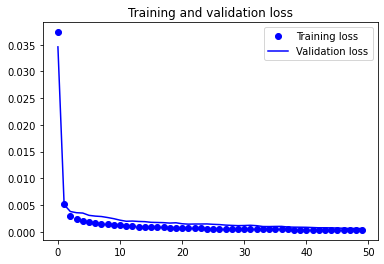

In [23]:
from matplotlib import pyplot as plt
import numpy as np

loss = np.array(autoencoder_train.history['loss'])
val_loss = np.array(autoencoder_train.history['val_loss'])
epochs = np.array(range(50))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
U_net.save_weights('U_net_arch.h5')

predict


In [25]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred= U_net.predict(x = test_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_TEST,
                         max_queue_size = 10
                         )

154/154 [==============================] - 50s 327ms/step


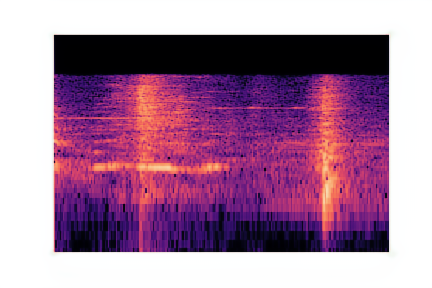

In [26]:
from keras.preprocessing import image

recon_arr = pred[0]*255
pred_img = image.array_to_img(recon_arr)
pred_img.save('my.png')
display(pred_img)

Get the Encoded layer and flatten it for the features which will be used in the classification model


In [27]:

encoded = Model(inputs=U_net.input, outputs=U_net.get_layer('block_5_conv2').output)
Y_test = encoded.predict(x = test_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_TEST,
                         max_queue_size = 10)

154/154 [==============================] - 1s 9ms/step


In [28]:
Y_train = encoded.predict(x = train_generator, 
                         batch_size=10,
                         verbose = 1,
                         steps = STEP_SIZE_TRAIN,
                         max_queue_size = 10)

47/47 [==============================] - 15s 318ms/step


In [29]:
Y_valid = encoded.predict(x = valid_generator, 
                         batch_size=10,
                         verbose = 1,
                         steps = STEP_SIZE_VALID,
                         max_queue_size = 10)

163/163 [==============================] - 2s 10ms/step


In [0]:
mean_encoded_test = np.mean(Y_test,axis = 3)
mean_encoded_train = np.mean(Y_train,axis = 3)
mean_encoded_valid = np.mean(Y_valid,axis = 3)

In [0]:
flatten_encoded_test = np.reshape(mean_encoded_test,(mean_encoded_test.shape[0], np.multiply(mean_encoded_test.shape[1],mean_encoded_test.shape[2])))
flatten_encoded_train = np.reshape(mean_encoded_train,(mean_encoded_train.shape[0], np.multiply(mean_encoded_train.shape[1],mean_encoded_train.shape[2])))
flatten_encoded_valid = np.reshape(mean_encoded_valid,(mean_encoded_valid.shape[0], np.multiply(mean_encoded_valid.shape[1],mean_encoded_valid.shape[2])))

In [32]:
print(flatten_encoded_valid.shape)

(163, 486)


In [0]:
#np.savetxt("encoded_features.csv", flatten_encoded, delimiter=",")

Convert the encoded part to a data frame or to a numpy. Still working

Use the obtained dataframe to feed and train the classifier.


In [0]:
import os
def get_file_length(file_path):
  path, dirs, files = next(os.walk(file_path))
  count = len(files)
  print(count)
  return count


In [35]:
belly_pain_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test/belly_pain')
burping_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test/burping')
discomfort_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test/discomfort')
hungry_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test/hungry')
tired_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/test/tired')

16
8
27
79
24


In [36]:
belly_pain_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train/belly_pain')
burping_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train/burping')
discomfort_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train/discomfort')
hungry_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train/hungry')
tired_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/train/tired')

48
24
91
235
72


In [37]:
belly_pain_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val/belly_pain')
burping_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val/burping')
discomfort_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val/discomfort')
hungry_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val/hungry')
tired_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/Mel_Spec_png/val/tired')

16
8
37
78
24


In [0]:
def get_labels(c1,c2,c3,c4,c5):
  labels = np.zeros((c1,1))
  labels = np.concatenate((labels,np.ones((c2,1))))
  labels = np.concatenate((labels,2*np.ones((c3,1))))
  labels = np.concatenate((labels,3*np.ones((c4,1))))
  labels = np.concatenate((labels,4*np.ones((c5,1))))
  print(labels.shape)
  return labels
  

In [39]:
labels_test = get_labels(belly_pain_count_test , burping_count_test , discomfort_count_test , hungry_count_test , tired_count_test)
labels_train = get_labels(belly_pain_count_train , burping_count_train , discomfort_count_train , hungry_count_train , tired_count_train)
labels_valid = get_labels(belly_pain_count_valid , burping_count_valid , discomfort_count_valid , hungry_count_valid , tired_count_valid)

(154, 1)
(470, 1)
(163, 1)


# Training using KNN 


In [46]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance') 
clf.fit(flatten_encoded_train,labels_train)

 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
predicted_valid = clf.predict(flatten_encoded_valid)
predicted_test = clf.predict(flatten_encoded_test)

In [48]:
predicted_test = predicted_test.reshape((len(predicted_test),1))
print(predicted_test.shape)

(154, 1)


In [49]:
import sklearn
acc_test = sklearn.metrics.accuracy_score(predicted_test,labels_test)
print(acc_test)
acc_valid = sklearn.metrics.accuracy_score(predicted_valid,labels_valid)
print(acc_valid)


0.512987012987013
0.4785276073619632
